In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('flavors_of_cacao.csv')

df.head()

,Company,BarName,REF,ReviewDate,CocoaPercent,companylocation,Rating,BeanType,BroadBeanOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [17]:
df.columns = [x.lower() for x in df.columns]

In [48]:
df.shape

(1795, 9)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          1795 non-null   object 
 1   barname          1795 non-null   object 
 2   ref              1795 non-null   int64  
 3   reviewdate       1795 non-null   int64  
 4   cocoapercent     1795 non-null   object 
 5   companylocation  1795 non-null   object 
 6   rating           1795 non-null   float64
 7   beantype         1794 non-null   object 
 8   broadbeanorigin  1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


# Top companies

In [25]:
df['company'].value_counts().head()

Soma        47
Bonnat      27
Fresco      26
Pralus      25
A. Morin    23
Name: company, dtype: int64

In [26]:
df['company'].nunique()

416

In [39]:
# with highest average rating

df.groupby('company').mean()['rating'].sort_values(ascending=False).head()

company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Name: rating, dtype: float64

# Cocoa percent analysis

In [ ]:
# df[df['cocoapercent']==df['cocoapercent'].min()]

df['cocoapercent'] = df['cocoapercent'].apply(lambda x:x.split("%")[0]).astype('float')

In [55]:
# company with highest cocoa percentage

df[df['cocoapercent']==df['cocoapercent'].max()]

,company,barname,ref,reviewdate,cocoapercent,companylocation,rating,beantype,broadbeanorigin
125,Artisan du Chocolat,Venezuela,486,2010,100.0,U.K.,1.75,,Venezuela
245,Bonnat,One Hundred,81,2006,100.0,France,1.50,,
249,Bouga Cacao (Tulicorp),"El Oro, Hacienda de Oro",341,2009,100.0,Ecuador,1.50,Forastero (Arriba),Ecuador
330,C-Amaro,Ecuador,1185,2013,100.0,Italy,3.50,,Ecuador
437,Claudio Corallo,Principe,252,2008,100.0,Sao Tome,1.00,Forastero,Sao Tome & Principe
449,Coppeneur,Ecuador Puristique,817,2012,100.0,Germany,1.50,,Ecuador
557,Domori,"IL100, H. San Jose",1109,2013,100.0,Italy,3.00,Criollo,Venezuela
779,Habitual,one hundred,1205,2014,100.0,Canada,2.00,,
828,Hotel Chocolat,"Island Growers, 2012, 120hr c.",1113,2013,100.0,U.K.,1.75,Trinitario,St. Lucia
834,Hotel Chocolat (Coppeneur),"Chanchamayo, Pichanadi, 2012, 60hr c.",1109,2013,100.0,U.K.,2.75,,Peru


In [56]:
# company with lowest cocoa percentage

df[df['cocoapercent']==df['cocoapercent'].min()]

,company,barname,ref,reviewdate,cocoapercent,companylocation,rating,beantype,broadbeanorigin
429,Chokolat Elot (Girard),Guadeloupe,1149,2013,42.0,Martinique,2.75,,Martinique


In [47]:
df['companylocation'].value_counts().head()

U.S.A.    764
France    156
Canada    125
U.K.       96
Italy      63
Name: companylocation, dtype: int64

In [59]:
df1 = df[df['cocoapercent']==df['cocoapercent'].max()]

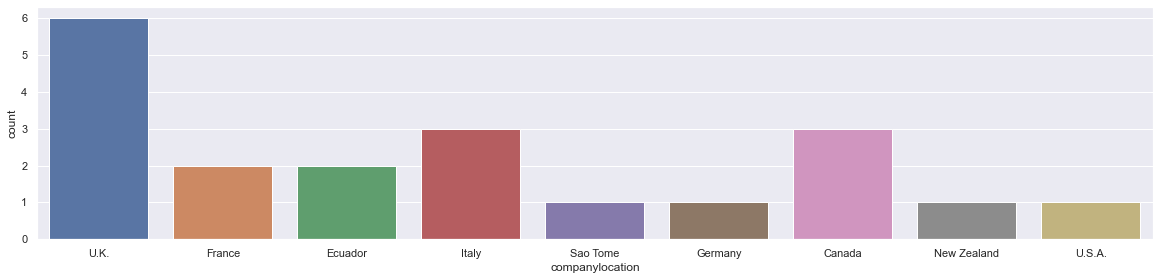

In [78]:
# plot of country locations having highest cocoa percentage

sns.countplot(x='companylocation', data=df1)
sns.set(rc={'figure.figsize':(10,4.27)})
# plt.figure(figsize=(40,30))

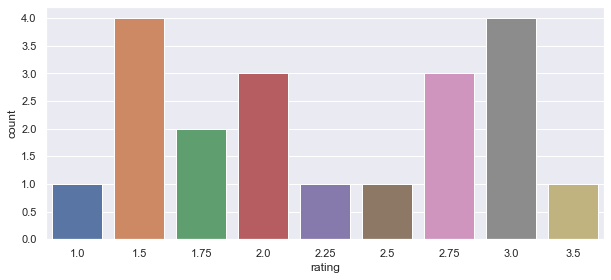

In [82]:
sns.countplot(x='rating', data=df1)
sns.set(rc={'figure.figsize':(10,4.27)})

In [84]:
df1.describe()

,ref,reviewdate,cocoapercent,rating
count,20.000000,20.000000,20.0,20.00000
mean,851.850000,2011.450000,100.0,2.25000
std,511.658632,2.946452,0.0,0.69301
min,81.000000,2006.000000,100.0,1.00000
25%,322.250000,2008.750000,100.0,1.68750
50%,1109.000000,2013.000000,100.0,2.12500
75%,1131.000000,2013.000000,100.0,2.81250
max,1760.000000,2016.000000,100.0,3.50000


# Rating analysis

In [130]:
df2 = pd.DataFrame(df.groupby('companylocation').rating.agg('max')).reset_index()

In [131]:
df2.head()

,companylocation,rating
0,Amsterdam,3.75
1,Argentina,3.75
2,Australia,4.00
3,Austria,3.75
4,Belgium,4.00


In [136]:
# location with highest average rating

df3 = pd.DataFrame(df.groupby('companylocation').mean()['rating'].sort_values(ascending=False)).reset_index()

In [137]:
df3.head()

,companylocation,rating
0,Chile,3.750000
1,Amsterdam,3.500000
2,Netherlands,3.500000
3,Philippines,3.500000
4,Iceland,3.416667


# Relation between cocoa percent and rating

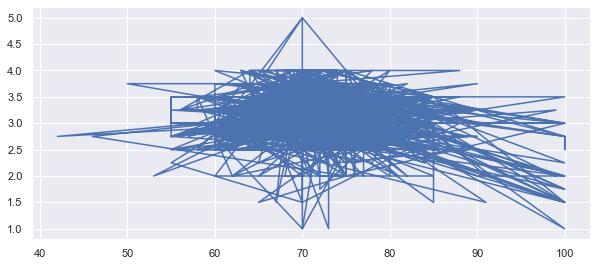

In [139]:
plt.plot(df['cocoapercent'], df['rating'])